# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
*   un scatterplot :
Nuage de points en coordonées cartésiennes. Généralement pour de nombreuses données avec une tendance, généralement en fonction de 2 variables.
*   un barplot :
Diagramme en bâton, utilisé pour représenter des comparaisons numériques discrètes en fonction de catégories.
*   un boxplot :
Boite à moustache, pour afficher la distribution des données à travers leurs quartiles. Utilisé principalement pour comparer un même caractère dans des populations de tailles différentes.
*   un violinplot :
Tracé de violon, permet de comparer des distributions de probabilités, en groupant par une ou plusieurs variables.
*   un histogramme :
Résumé de données discrètes ou continues présentées par intervalles de valeurs. Utilisé pour montré les caractéristiques principales de la distribution des données.
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau CSV avec les titres des colonnes en première ligne :
Organism/Name	Kingdom	 Group	SubGroup	Size (Mb)	Chrs	Organelles	Plasmids	BioProjects
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name : nom de l'organisme 
Kingdom : rang taxonomique
Group : groupe d'organismes            
SubGroup : sous-groupe de taxonomie NCBI 
Size (Mb) : taille estimée du génome
Chrs : nombre de chromosomes
Organelles : nombre d'organelles 
Plasmids : nombre de plasmides 
BioProjects : nombre de projets de séquencement de génome
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [6]:
# On compte le nombre de lignes du fichier, -2 pour la ligne de titres des colonnes et la dernière

with open(r"overview.txt", 'r') as myfile:
    lines = len(myfile.readlines()) - 2
    print('Nombre d\'organismes : ', lines)


Nombre d'organismes :  87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
C'est un niveau de classification du vivant. C'était le plus haut niveau dans la classification originelle des êtres vivants. Actuellement, il est divisé en 7 catégories.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y en a 4 : 
- Archaea : procaryotes unicellulaires (une cellule sans noyau) à histones
- Bacteria : procaryotes unicellulaires (une cellule sans noyau) sans histones
- Eukaryota : organismes, unicellulaires ou multicellulaires, avec noyaux
- Viruses : particules microscopiques infectieuses 
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [7]:
import pandas as pd

# Création d'un Dataframe contenant toutes les valeurs

df = pd.read_csv('overview.txt', sep='\t', header=0, dtype='string')
# print(df.values[0])
# print(df.columns)

kingdoms = ['Archaea', 'Bacteria', 'Eukaryota', 'Viruses']

for k in kingdoms :
    print( 'Il y a ', df['Kingdom'].value_counts()[k], ' ', k)


Il y a  2263   Archaea
Il y a  37492   Bacteria
Il y a  15560   Eukaryota
Il y a  32573   Viruses


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
C'est le niveau de classification en-dessous de royaume.
```

Q9. Combien de groupes sont présents par royaume ?

In [8]:
for k in kingdoms :
    print( 'Il y a ', len(df.loc[df['Kingdom'] == k]['Group'].unique()), ' groupes de ', k )

Il y a  11  groupes de  Archaea
Il y a  37  groupes de  Bacteria
Il y a  5  groupes de  Eukaryota
Il y a  8  groupes de  Viruses


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [9]:
for k in kingdoms :
    print('\n', k)
    l = df.loc[df['Kingdom'] == k]['Group'].unique().tolist()
    for gr in l :
        print( gr, ': ', df['Group'].loc[df['Kingdom'] == k].value_counts()[gr] )
        


 Archaea
TACK group :  408
Candidatus Thermoplasmatota :  432
Euryarchaeota :  1035
Other :  1
unclassified Archaea :  57
Asgard group :  61
DPANN group :  249
Candidatus Hadarchaeota :  8
Candidatus Hydrothermarchaeota :  6
Halobacteriota :  1
environmental samples :  5

 Bacteria
Terrabacteria group :  13337
unclassified Bacteria :  346
FCB group :  5037
Pseudomonadota :  11098
Acidobacteriota :  256
Synergistota :  85
Bacteria incertae sedis :  3872
PVC group :  1091
Myxococcota :  146
Campylobacterota :  256
Thermodesulfobacteriota :  568
Spirochaetota :  344
Aquificota :  42
Thermotogota :  72
Atribacterota :  43
Other :  2
Bdellovibrionota :  122
delta/epsilon subdivisions :  288
Caldisericota/Cryosericota group :  21
Deferribacterota :  27
Calditrichota :  10
Candidatus Lernaellota :  2
Elusimicrobiota :  118
Fusobacteriota :  79
Candidatus Deferrimicrobiota :  2
Nitrospinota/Tectimicrobiota group :  39
Candidatus Hinthialibacterota :  2
Candidatus Krumholzibacteriota :  4
Nitr

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

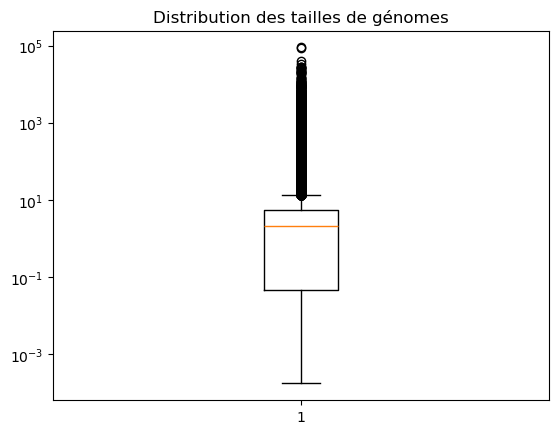

In [10]:
import matplotlib.pyplot as plt

s = 'Size (Mb)'

sizes = pd.to_numeric(df.loc[df[s] != '-'][s])

plt.boxplot(sizes)
plt.yscale('log')
plt.title('Distribution des tailles de génomes')
plt.show()

Q12. Affichez la distribution par royaume.

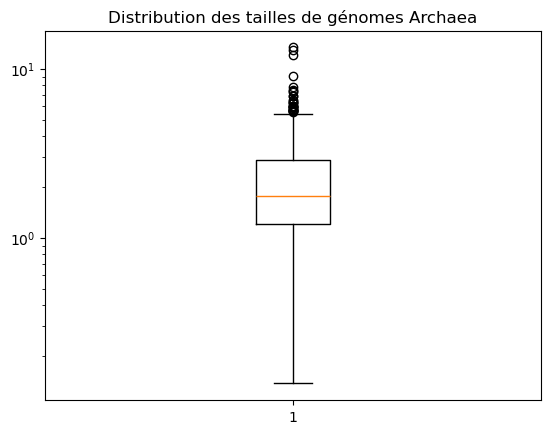

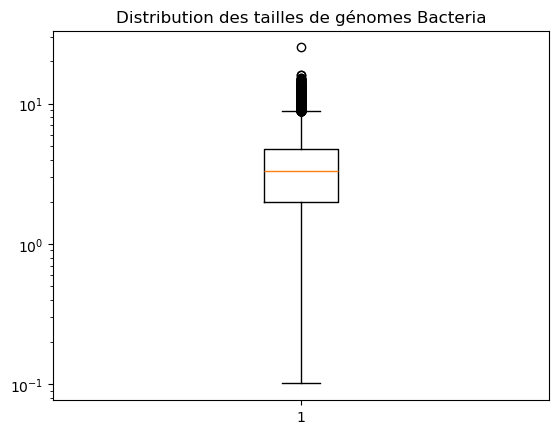

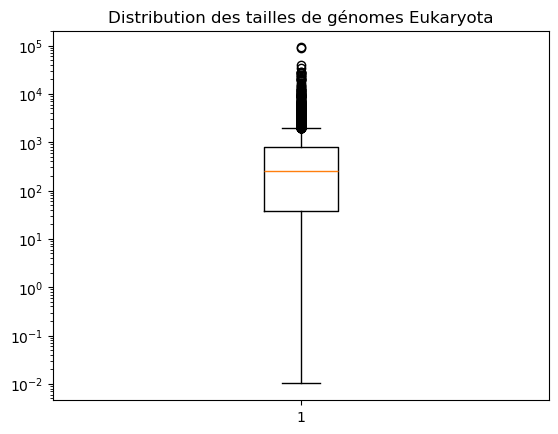

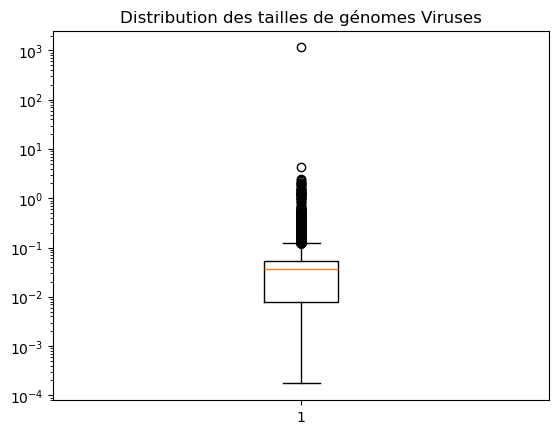

In [11]:
for k in kingdoms :
    pl = pd.to_numeric(df.loc[df[s] != '-'].loc[ df['Kingdom'] == k][s])
    plt.boxplot(pl)
    plt.yscale('log')
    plt.title('Distribution des tailles de génomes ' + k)
    plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

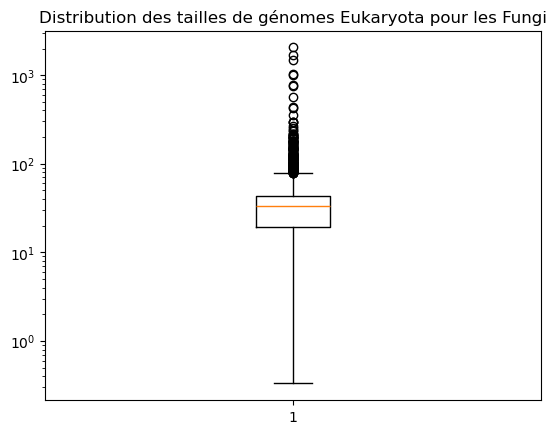

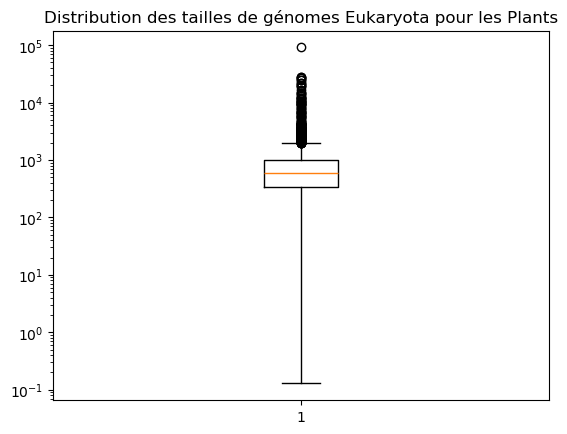

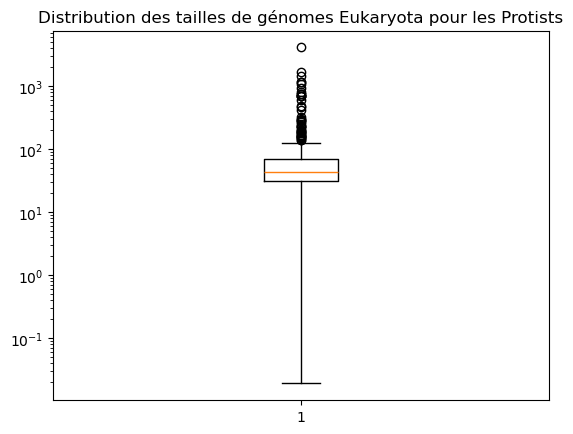

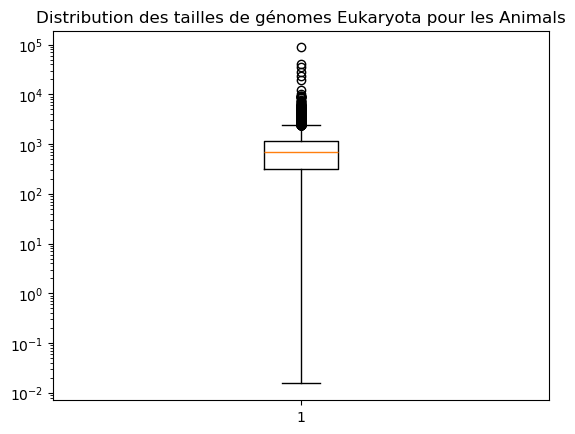

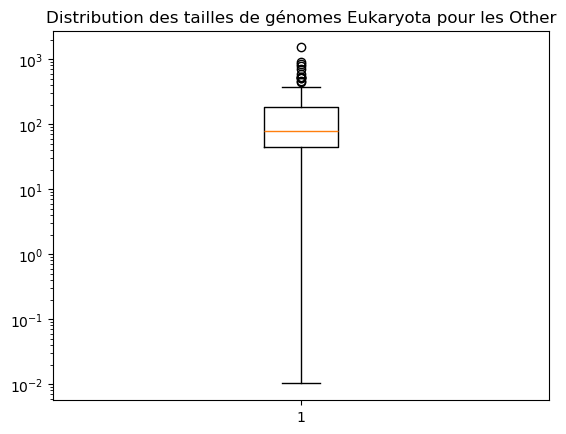

In [12]:
# Exemple fait seulement pour les eucaryotes, pour éviter d'afficher trop de plots

for k in ['Eukaryota'] :
    groups_list = df.loc[df['Kingdom'] == k]['Group'].unique().tolist()
    
    for gr in groups_list :
        pl = pd.to_numeric(df.loc[df[s] != '-'].loc[df['Kingdom'] == k].loc[df['Group'] == gr][s])
        plt.boxplot(pl)
        plt.yscale('log')
        plt.title('Distribution des tailles de génomes ' + k + ' pour les ' + gr)
        plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [21]:
df2 = df.copy()
df2 = df2.loc[ df[s] != '-']
df2[s] = pd.to_numeric(df2[s])

min_size_idx = df2.groupby('Kingdom')[s].idxmin()

smallest = df2.loc[min_size_idx, ['#Organism/Name', 'Kingdom', s]]

print(smallest)

                                         #Organism/Name    Kingdom  Size (Mb)
13060  candidate division MSBL1 archaeon SCGC-AAA385M02    Archaea   0.137797
7691                               bacterium AG-323-L21   Bacteria   0.101587
33850                       Fragilariopsis kerguelensis  Eukaryota   0.010223
38605                   Hippotragine gammaherpesvirus 1    Viruses   0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [23]:
max_size_idx = df2.groupby('Kingdom')[s].idxmax()

biggest = df2.loc[max_size_idx, ['#Organism/Name', 'Kingdom', s]]

print(biggest)

         #Organism/Name    Kingdom  Size (Mb)
5108           archaeon    Archaea    13.3999
81774         Thiomonas   Bacteria    25.1426
85849      Viscum album  Eukaryota    91113.7
84080  uncultured virus    Viruses    1150.68


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

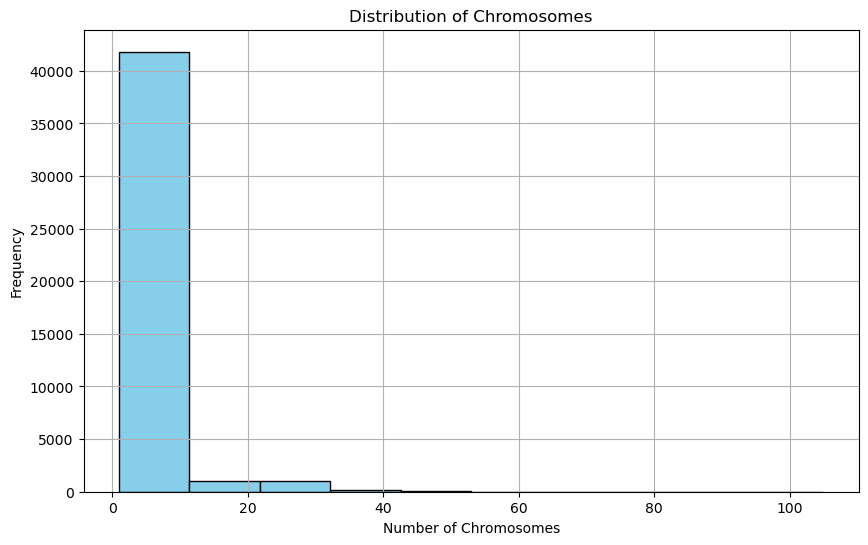

In [34]:
df2 = df.copy()
df2 = df2.loc[ df['Chrs'] != '-']
df2['Chrs'] = pd.to_numeric(df2['Chrs'])

plt.figure(figsize=(10, 6))
plt.hist(df2['Chrs'], color='skyblue', edgecolor='black')
plt.title('Distribution of Chromosomes')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

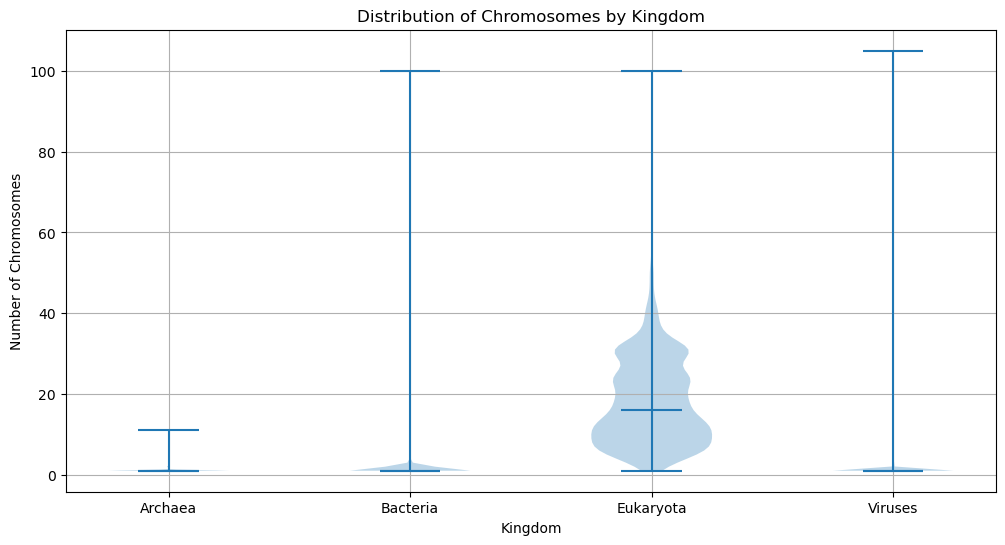

In [28]:
df2 = df.copy()
df2 = df2.loc[ df['Chrs'] != '-']
df2['Chrs'] = pd.to_numeric(df2['Chrs'])

grouped = df2.groupby('Kingdom')['Chrs'].apply(list)

plt.figure(figsize=(12, 6))
plt.violinplot([group for group in grouped], showmeans=False, showmedians=True)
plt.xticks(range(1, len(grouped) + 1), grouped.index)

plt.title('Distribution of Chromosomes by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Number of Chromosomes')
plt.grid(True)

plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Seuls les eucaryotes semblent avoir une distribution de chromosomes variée.
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

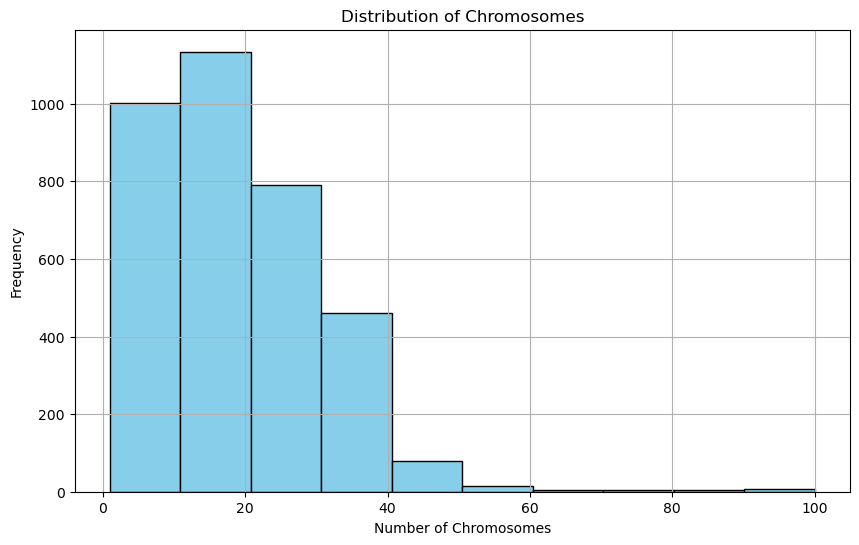

In [35]:
df2 = df.copy()
df2 = df2.loc[ df['Chrs'] != '-']
df2['Chrs'] = pd.to_numeric(df2['Chrs'])

plt.figure(figsize=(10, 6))
plt.hist(df2[df2['Kingdom'] == 'Eukaryota']['Chrs'], color='skyblue', edgecolor='black')
plt.title('Distribution of Chromosomes')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

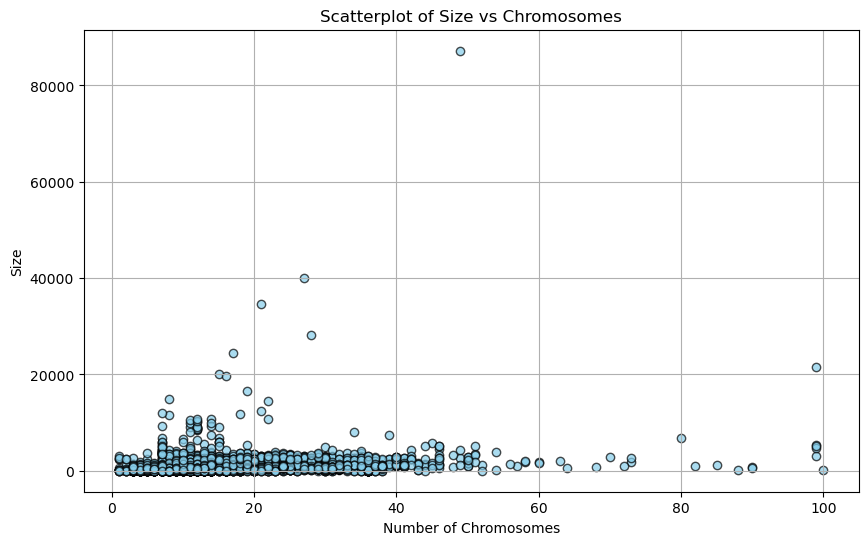

In [38]:
df2 = df.copy()
df2 = df2.loc[ df['Chrs'] != '-']
df2 = df2.loc[ df2[s] != '-']
df2['Chrs'] = pd.to_numeric(df2['Chrs'])
df2[s] = pd.to_numeric(df2[s])

plt.figure(figsize=(10, 6))
plt.scatter(df2[df2['Kingdom'] == 'Eukaryota']['Chrs'], df2[df2['Kingdom'] == 'Eukaryota'][s], color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Scatterplot of Size vs Chromosomes')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Size')
plt.grid(True)

# Show the plot
plt.show()

Q21. Qu’observez-vous ?

```markdown
On a une faible corrélation positive.
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Une petite molécule d'ADN dans le cytoplasme qui possède la capacité de se reproduire elle-même.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

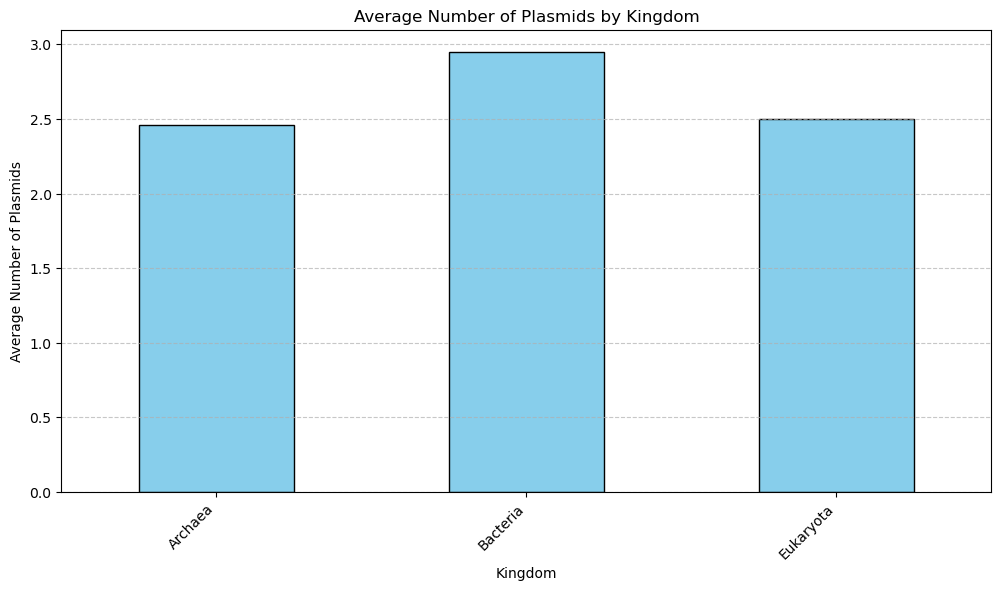

In [40]:
df2 = df.copy()
df2 = df2.loc[ df['Plasmids'] != '-']
df2['Plasmids'] = pd.to_numeric(df2['Plasmids'])

avg_by_kingdom = df2.groupby('Kingdom')['Plasmids'].mean()

plt.figure(figsize=(12, 6))
avg_by_kingdom.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Number of Plasmids by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Number of Plasmids')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


Q24. Qu'observez-vous ?

```markdown
Les virus n'ont pas de plasmides.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Un projet de séquencement de génome de la base de données BioProject
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

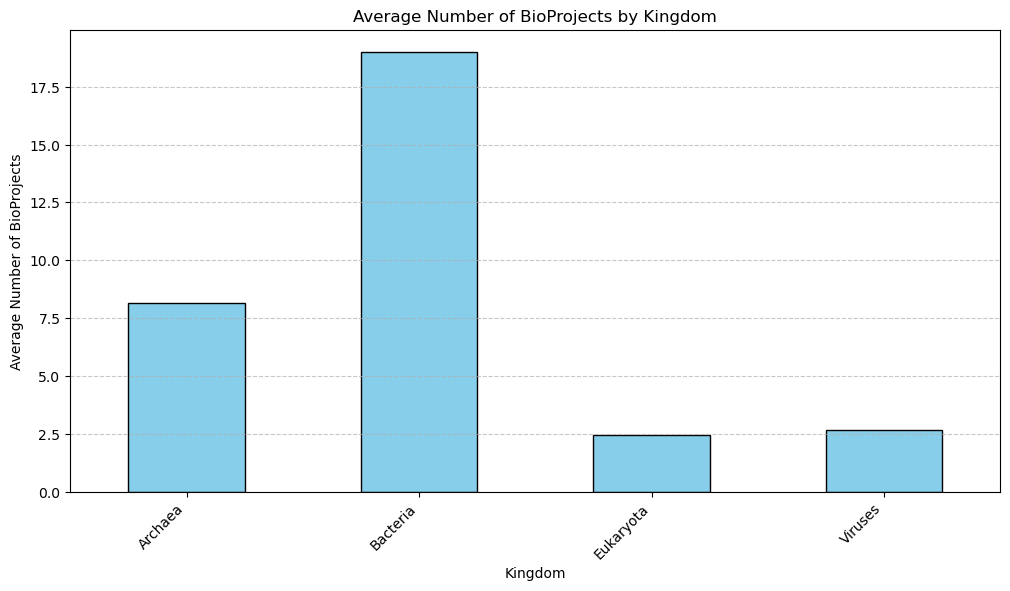

In [41]:
df2 = df.copy()
df2 = df2.loc[ df['BioProjects'] != '-']
df2['BioProjects'] = pd.to_numeric(df2['BioProjects'])

avg_by_kingdom = df2.groupby('Kingdom')['BioProjects'].mean()

plt.figure(figsize=(12, 6))
avg_by_kingdom.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Number of BioProjects by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Number of BioProjects')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [49]:
print(df[df['BioProjects'] == '-'].shape[0])

2


Q28. Combien d'organismes ont > 1 projets ?

In [51]:
df2 = df.copy()
df2 = df2.loc[ df['BioProjects'] != '-']
df2['BioProjects'] = pd.to_numeric(df2['BioProjects'])
print(df2[df2['BioProjects'] > 1 ].shape[0])

18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [54]:
df2 = df.copy()
df2 = df2.loc[ df['BioProjects'] != '-']
df2['BioProjects'] = pd.to_numeric(df2['BioProjects'])

top = df2.sort_values(by='BioProjects', ascending=False).head(5)

print(top[[ '#Organism/Name', 'Kingdom', 'BioProjects' ]])

                             #Organism/Name   Kingdom  BioProjects
29710                      Escherichia coli  Bacteria        39907
41700                 Klebsiella pneumoniae  Bacteria        21229
75957                 Staphylococcus aureus  Bacteria        17228
70775                   Salmonella enterica  Bacteria        16613
83689  uncultured Lachnospiraceae bacterium  Bacteria        15909


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Ce sont des bactéries responsables de maladies chez l'homme.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici